In [1]:
# A diferencia de el libro, utilizare siempre google tensorflow
from tensorflow.keras.datasets import imdb

In [2]:
# Importamos los datos
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\selra\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\selra\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprec

In [3]:
print("train data:",train_data.shape,train_data[0]) #Lista de 25000 listas de longitud variable
print("Train label: ", train_labels[:5]) # 25000 valores booleanos 
print(max([max(sequence) for sequence in train_data]))
print("test data:",test_data.shape,test_data[0]) #Lista de 25000 listas de longitud variable
print("test label: ", test_labels[:5]) # 25000 valores booleanos 

train data: (25000,) [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Train label:  [1 0 0 1 0]
9999
test dat

In [4]:
import matplotlib.pyplot as plt
import numpy as np

a = np.array([])
for i in range(25000):
    a = np.concatenate((a,np.array(train_data[i])),axis=0)
print(len(a))


5967841


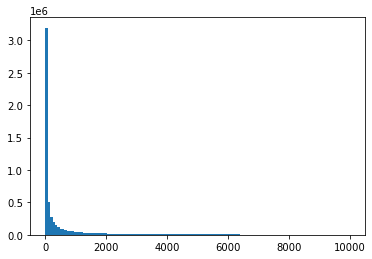

In [5]:
_=plt.hist(a,bins=128)

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print("Primera review: ", decoded_review)

Primera review:  ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have d

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

print("x_train: ",x_train[25000-1],x_train.shape) # Lista de indices (el indice mas alto solo puede ser 9999)
print("x_test", x_test[0],x_test.shape)

x_train:  [0. 1. 1. ... 0. 0. 0.] (25000, 10000)
x_test [0. 1. 1. ... 0. 0. 0.] (25000, 10000)


In [8]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
# model.compile(optimizer='rmsprop',
#         loss='binary_crossentropy',
#         metrics=['accuracy'])

In [10]:
# from tensorflow.keras import optimizers
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#         loss='binary_crossentropy',
#         metrics=['accuracy'])

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]



In [12]:
model.compile(optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy'])
history = model.fit(partial_x_train,
        partial_y_train,
        epochs=20,
        batch_size=512,
        validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 0s 16ms/step - loss: 5.9183e-08 - accuracy: 0.5115 - val_loss: 6.0236e-08 - val_accuracy: 0.5073
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 5.9183e-08 - accuracy: 0.5115 - val_loss: 6.0236e-08 - val_accuracy: 0.5073
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 5.9183e-08 - accuracy: 0.5115 - val_loss: 6.0236e-08 - val_accuracy: 0.5073
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 5.9183e-08 - accuracy: 0.5115 - val_loss: 6.0236e-08 - val_accuracy: 0.5073
Epoch 5/20
30/30 [==============================] - 0s 7ms/step - loss: 5.9183e-08 - accuracy: 0.5115 - val_loss: 6.0236e-08 - val_accuracy: 0.5073
Epoch 6/20
30/30 [==============================] - 0s 7ms/step - loss: 5.9183e-08 - accuracy: 0.5115 - val_loss: 6.0236e-08 - val_accuracy: 0.5073
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 5.9183e-08 - accuracy: 0.5115 - val_los

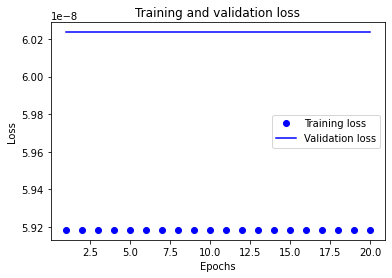

In [15]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

KeyError: 'acc'

<Figure size 432x288 with 0 Axes>